In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('./data/coronavirus_updated_dataset.csv')

In [22]:
df.columns

Index(['Unnamed: 0', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Recovered', 'Deaths'],
      dtype='object')

In [23]:
df_per_day = df.groupby("Date")['Confirmed', 'Recovered', 'Deaths'].sum()

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [24]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [25]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,57.000000,57.000000,57.000000
mean,70894.456140,26690.105263,2341.438596
std,52451.938644,27795.733584,2098.762816
min,555.000000,28.000000,17.000000
25%,27635.000000,1124.000000,564.000000
50%,75639.000000,16121.000000,2122.000000
75%,95120.000000,51170.000000,3254.000000
max,214910.000000,83207.000000,8733.000000


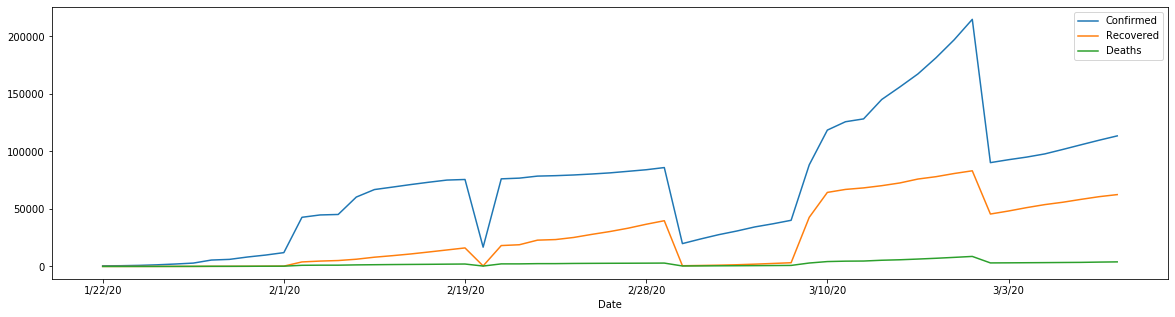

In [26]:
df_per_day.plot(kind='line',figsize=(20,5))

In [27]:
#Time Series 
import fbprophet

In [28]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [29]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [30]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [31]:
#Split data
df_per_day 

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28,17
1/23/20,653,30,18
1/24/20,941,36,26
1/25/20,1434,39,42
1/26/20,2118,52,56
1/27/20,2927,61,82
1/28/20,5578,107,131
1/29/20,6166,126,133
1/30/20,8234,143,171


In [32]:
global_cases = df_per_day.reset_index()

In [33]:
global_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,555,28,17
1,1/23/20,653,30,18
2,1/24/20,941,36,26
3,1/25/20,1434,39,42
4,1/26/20,2118,52,56


In [34]:
confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]

In [35]:
confirmed_cases.shape

(57, 2)

In [37]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

C:\Users\Anubhav\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
train = confirmed_cases[:40]
test = confirmed_cases[40:]

In [39]:
train.head()

,ds,y
0,1/22/20,555
1,1/23/20,653
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [40]:
#Fit model
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#Future date
future_dates = m.make_future_dataframe(periods=15)

In [42]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [43]:
#Prediction
prediction = m.predict(future_dates)

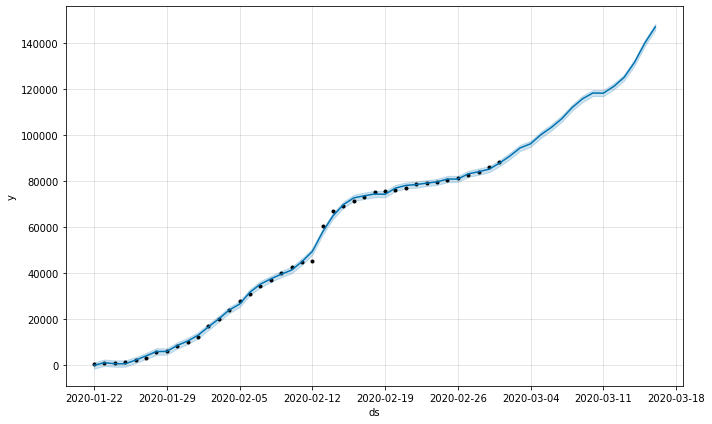

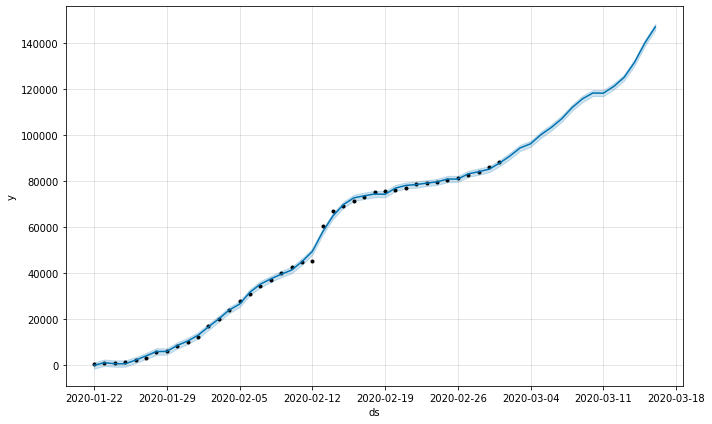

In [44]:
#Plot prediction
m.plot(prediction)

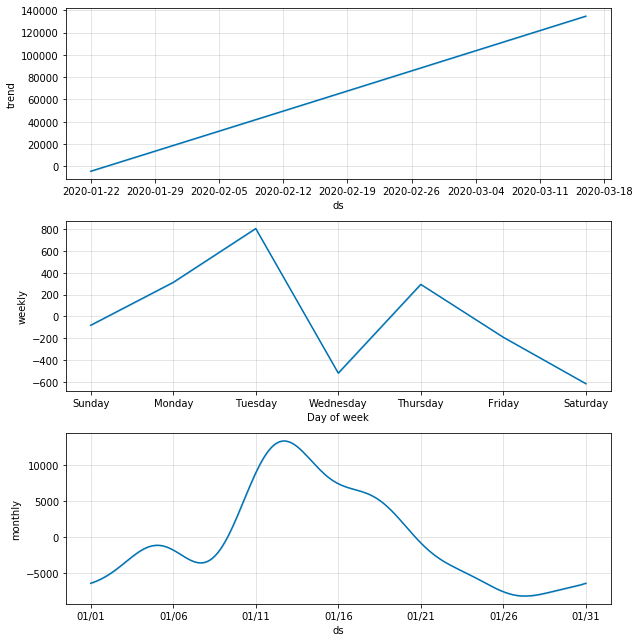

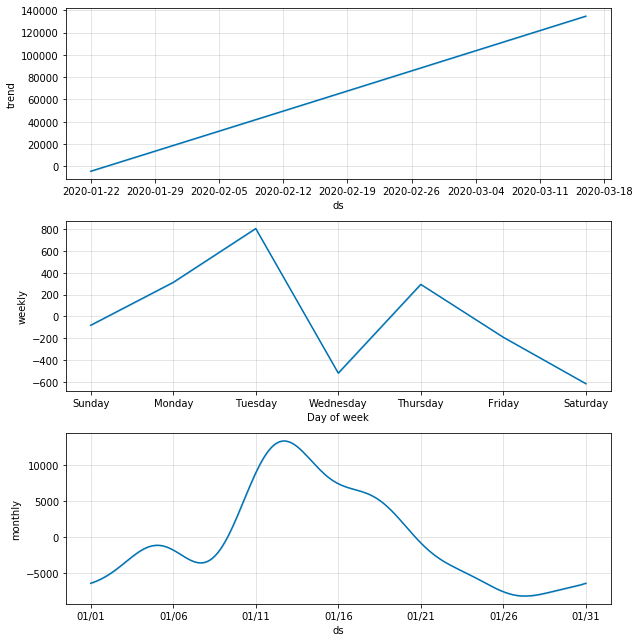

In [45]:
m.plot_components(prediction)

In [46]:
test

,ds,y
40,3/10/20,118592
41,3/11/20,125865
42,3/12/20,128343
43,3/13/20,145193
44,3/14/20,156094
45,3/15/20,167446
46,3/16/20,181527
47,3/17/20,197142
48,3/18/20,214910
49,3/2/20,90306


In [48]:
test['dates'] = pd.to_datetime(test['ds'])

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
test

,ds,y,dates
40,3/10/20,118592,2020-03-10
41,3/11/20,125865,2020-03-11
42,3/12/20,128343,2020-03-12
43,3/13/20,145193,2020-03-13
44,3/14/20,156094,2020-03-14
45,3/15/20,167446,2020-03-15
46,3/16/20,181527,2020-03-16
47,3/17/20,197142,2020-03-17
48,3/18/20,214910,2020-03-18
49,3/2/20,90306,2020-03-02


In [50]:
test = test.set_index("dates")

In [52]:
test = test['y']

In [54]:
import matplotlib.pyplot as plt

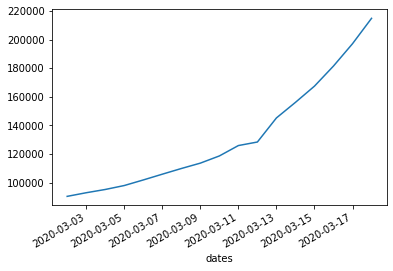

In [55]:
test.plot()

In [56]:
#Find Point/Dates for change
from fbprophet.plot import add_changepoints_to_plot

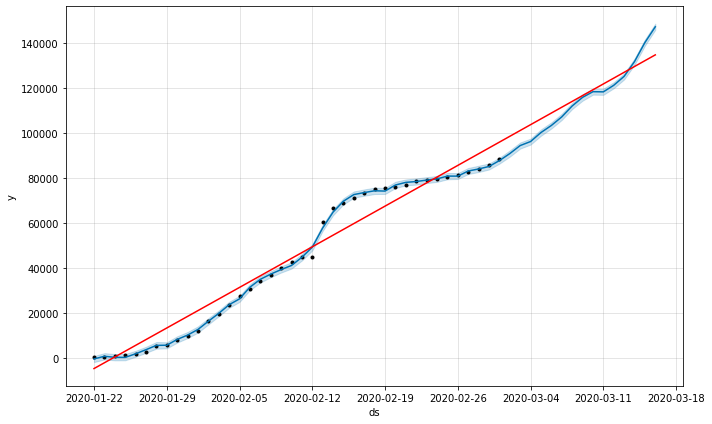

In [57]:
fig = m.plot(prediction)
c= add_changepoints_to_plot(fig.gca(),m,prediction)